In [285]:
import pandas as pd
import numpy as np
from re import search
import matplotlib.pyplot as plt
import sklearn.metrics

In [270]:
with open('dialog_acts.dat', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: [x[0:x.index(" ")], x[x.index(" ")+1:-1]], data))
df = pd.DataFrame(np.array(data), columns = ['label', 'text'])
df = df[df.label != 'null']
df = df.reset_index()

In [286]:

def BaselineRuleBased(dataframe):
    """
    Rule-based prediction of dialog acts based on utterances.
    Arguments:
        dataframe: a pandas dataframe that contains a column named text with utterances.
        
    Returns:
        Returns a list of predictions about the label (dialog act) of the utterances.
    """
    predictions = []
    for i in range(0,len(dataframe)):
        if search(r'\bhow about\b|\bwhat about\b|\banything else\b|\bare there\b|\bis there\b|\bwhat else\b', df.loc[i,'text']):
            predictions.append('reqalts')
        elif search(r'\byes\b|\byeah\b|\bcorrect\b',df.loc[i,'text']):
            predictions.append('affirm')
        elif search(r'\bthank you\b', df.loc[i,'text']):
            predictions.append('thankyou')
        elif search(r'\bgoodbye\b|\bbye\b', df.loc[i,'text']):
            predictions.append('bye')
        elif search(r'\bdoes it\b|\bis it\b|\bdo they\b|\bis that\b|\bis there\b', df.loc[i,'text']):
            predictions.append('confirm')
        elif search(r'\bwhat is\b|\bwhats\b|\bmay i\b|\bcould i\b|\bwhat\b|\bprice range\b|\bpost code\b|\btype of\b|\baddress\b|\bphone number\b|\bcan i\b|\bcould i\b|\bcould you\b|\bdo you\b|\bi want+.address\b|\bi want+.phone\b|\bi would\b|\bwhere is\b', df.loc[i,'text']):
            predictions.append('request')
        elif search(r'\bno\b|\bnot\b', df.loc[i,'text']):
            predictions.append('negate')
        elif search(r'\blooking for\b|\bdont care\b|\bdoesnt matter\b|\bexpensive\b|\bcheap\b|\bmoderate\b|\bi need\b|\bi want\b|\bfood\b|\bnorth\b',df.loc[i,'text']):
            predictions.append('inform')
        elif search(r'\bdont\b', df.loc[i,'text']):
            predictions.append('deny')
        elif search(r'\bhello\b', df.loc[i,'text']):
            predictions.append('hello')
        elif search(r'\brepeat\b', df.loc[i,'text']):
            predictions.append('repeat')
        elif search(r'\bmore\b', df.loc[i,'text']):
            predictions.append('reqmore')
        elif search(r'\bstart\b', df.loc[i,'text']):
            predictions.append('restart')
        elif search(r'\bokay\b|\bkay\b',df.loc[i,'text']):
            predictions.append('ack')
        else:
            predictions.append('inform')
    return predictions

In [287]:
def new_sentence(utterance):
    """
    Rule-based prediction of a dialog act based on a phrase.
    Arguments:
        utterance: string
        
    Returns:
        Returns the predicted dialog act.
    """
    utterance = utterance.lower()
    if search(r'\bhow about\b|\bwhat about\b|\banything else\b|\bare there\b|\bis there\b|\bwhat else\b', utterance):
        return 'reqalts'
    elif search(r'\byes\b|\byeah\b|\bcorrect\b',utterance):
        return 'affirm'
    elif search(r'\bthank you\b', utterance):
        return 'thankyou'
    elif search(r'\bgoodbye\b|\bbye\b', utterance):
        return 'bye'
    elif search(r'\bdoes it\b|\bis it\b|\bdo they\b|\bis that\b|\bis there\b', utterance):
        return 'confirm'
    elif search(r'\bwhat is\b|\bwhats\b|\bmay i\b|\bcould i\b|\bwhat\b|\bprice range\b|\bpost code\b|\btype of\b|\baddress\b|\bphone number\b|\bcan i\b|\bcould i\b|\bcould you\b|\bdo you\b|\bi want+.address\b|\bi want+.phone\b|\bi would\b|\bwhere is\b', utterance):
        return 'request'
    elif search(r'\bno\b|\bnot\b', utterance):
        return 'negate'
    elif search(r'\blooking for\b|\bdont care\b|\bdoesnt matter\b|\bexpensive\b|\bcheap\b|\bmoderate\b|\bi need\b|\bi want\b|\bfood\b|\bnorth\b',utterance):
        return 'inform'
    elif search(r'\bdont\b', utterance):
        return 'deny'
    elif search(r'\bhello\b|\bhi\b|\bhey\b', utterance):
        return 'hello'
    elif search(r'\brepeat\b', utterance):
        return 'repeat'
    elif search(r'\bmore\b', utterance):
        return 'reqmore'
    elif search(r'\bstart\b', utterance):
        return 'restart'
    elif search(r'\bokay\b|\bkay\b',utterance):
        return 'ack'
    else:
        return 'inform'
    

In [288]:
    def plot_confusion_matrix(labels,predictions):
        """Plots the confusion matrix
        Arguments:
        labels: array-like of shape (n_samples,)
        predictions: array-like of shape (n_samples,)
        Returns
        -------
        plot
            plots the confusion matrix
        """
        plt.rcParams.update(plt.rcParamsDefault)

        plt.rcParams['figure.figsize'] = [10, 10]
        plt.rcParams['font.size'] = 8
        sklearn.metrics.ConfusionMatrixDisplay.from_predictions(labels,predictions)

        plt.show()

In [289]:
predictions = (rules(df))

In [290]:
def baselineAccuracy(predictions, df):
    """Calculates the accuracy
        Arguments:
        predictions: list
        df: a pandas dataframe that contains a column named text with utterances.
        Returns
        -------
    Returns:
        Returns the accuracy
    """
    count = 0
    for i in range(0,len(predictions)):
        
        if(predictions[i].lower() == df.loc[i,'label'].lower()):
            count += 1
    return "Accuracy: "+str(round(count / len(predictions)*100,1))+"%"
        

In [291]:
baselineAccuracy(predictions, df)

'Accuracy: 93.4%'

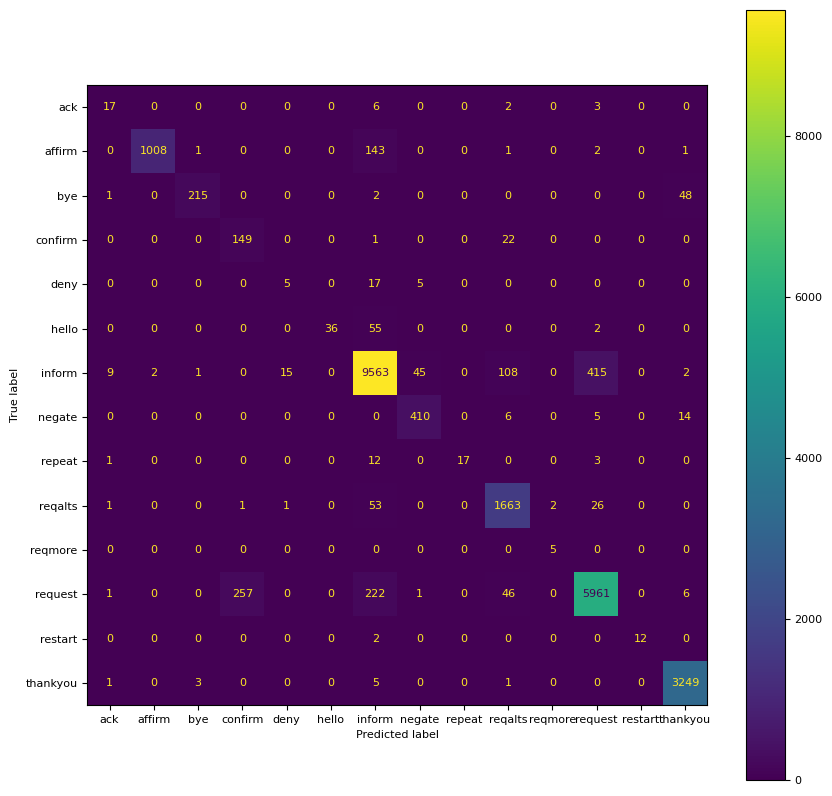

In [292]:
plot_confusion_matrix(df['label'],predictions)

In [293]:
 def metrics_overview(labels, predictions):
        """Prints metrics
        Arguments:
        labels: array-like of shape (n_samples,)
        predictions: array-like of shape (n_samples,)
        
        Prints different metrics related to the confusion matrix.
        """
        edges_confusion_matrix = sklearn.metrics.confusion_matrix(labels,predictions)

        FP = edges_confusion_matrix.sum(axis=0) - np.diag(edges_confusion_matrix)  
        
        FN = edges_confusion_matrix.sum(axis=1) - np.diag(edges_confusion_matrix)
        
        TP = np.diag(edges_confusion_matrix)
        
        TN = edges_confusion_matrix.sum() - (FP + FN + TP)
        
        
        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        print('TPR',TPR)
        print('Average TPR',np.average(TPR))
        print('_______________________________')
        # Specificity or true negative rate
        TNR = TN/(TN+FP)
        print('TNR',TNR)
        print('Average TNR',np.average(TNR))
        print('_______________________________')

        # Precision or positive predictive value
        PPV = TP/(TP+FP)
        print('PPV',PPV)
        print('Average PPV',np.average(PPV))
        print('_______________________________')

        # Negative predictive value
        NPV = TN/(TN+FN)
        print('NPV',NPV)
        print('Average NPV',np.average(NPV))
        print('_______________________________')

        # Fall out or false positive rate
        FPR = FP/(FP+TN)
        print('FPR',FPR)
        print('Average FPR',np.average(FPR))
        print('_______________________________')

        # False negative rate
        FNR = FN/(TP+FN)
        print('FNR',FNR)
        print('Average FNR',np.average(FNR))
        print('_______________________________')

        # False discovery rate
        FDR = FP/(TP+FP)
        print('FDR',FDR)
        print('Average FDR',np.average(FDR))
        print('_______________________________')

        # Overall accuracy
        ACC = (TP+TN)/(TP+FP+FN+TN)
        print('ACC',ACC)
        print('Average ACC',np.average(ACC))
        print('_______________________________')

        F1 = 2*((PPV*TPR)/(PPV+TPR))
        F1 = F1[~np.isnan(F1)]
        print('F1',F1)
        print('Average F1',np.average(F1))
        print('_______________________________')
        print((FP+FN)/(TP+FP+FN+TN))

In [294]:
metrics_overview(df['label'],predictions)

TPR [0.60714286 0.87197232 0.80827068 0.86627907 0.18518519 0.38709677
 0.94124016 0.94252874 0.51515152 0.95191757 1.         0.91792424
 0.85714286 0.99693157]
Average TPR 0.7749131093978147
_______________________________
TNR [0.99941327 0.99991202 0.99978834 0.98912173 0.99932948 1.
 0.96226965 0.99782553 1.         0.99159967 0.99991626 0.97378557
 1.         0.99655841]
Average TNR 0.9935371381314229
_______________________________
PPV [0.5483871  0.9980198  0.97727273 0.36609337 0.23809524 1.
 0.94861621 0.88937093 1.         0.89940508 0.71428571 0.92893876
 1.         0.97861446]
Average PPV 0.8205070988610307
_______________________________
NPV [0.99953894 0.99353119 0.99784528 0.99902053 0.99907826 0.99761036
 0.95676419 0.9989329  0.99932976 0.99618875 1.         0.96949405
 0.99991624 0.99951383]
Average NPV 0.9933403056727056
_______________________________
FPR [5.86731487e-04 8.79778296e-05 2.11658130e-04 1.08782730e-02
 6.70522169e-04 0.00000000e+00 3.77303518e-02 2.174